# Sentiment Analysis

## Part 2: Word Embeddings and Neural Network

In this notebook you will learn a powerful method to represent word in the numerical way and apply it to a simply 2-layer network for classification.

**Outline**:

- Neural Network
- Word Embeddings


**Pipeline**

<img src="resources/pipeline.png" width="800px">

## Neural Network

For this section, we will introduce some basis about neural network and define a basic NN using PyTorch. I assume you have knowledge about **Logistic Regression**.

### Logistic Regression (linear)

There are two ways to build a model in Keras:

1. Define a new Model class from `nn.Module` base class. Override `__init__` and `forward`.
2. Define a `nn.Sequential` and add layers one by one

In [1]:
# import utils and set plt settings
import utils
import matplotlib.pyplot as plt
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook

%matplotlib inline
%config InlineBackend.figure_format='retina'

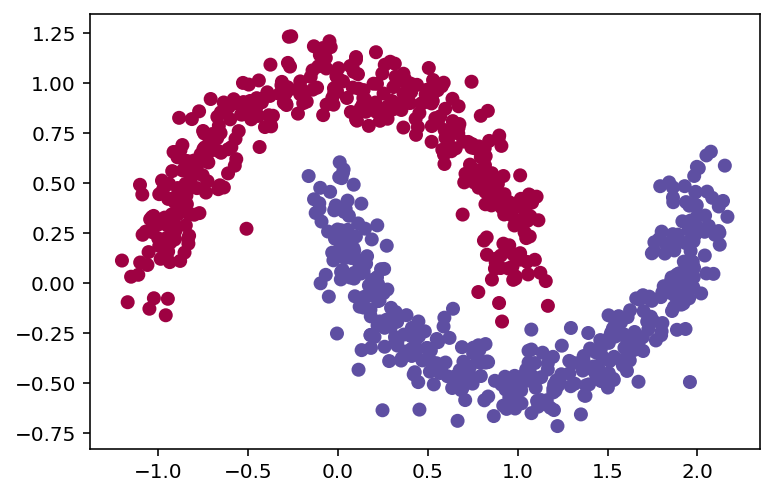

In [2]:
# Make and load Moon Dataset
train_x, test_x, train_y, test_y = utils.load_moon()

plt.scatter(
    train_x[:,0],     # first feature as x
    train_x[:,1],     # second feature as y
    c=train_y.T[0],   # label as color
    cmap=plt.cm.Spectral)

In [3]:
# These are 
print('type of train and test', type(train_x))
print('shape of X', train_x.shape)
print('shape of Y', train_y.shape)

type of train and test <class 'numpy.ndarray'>
shape of X (800, 2)
shape of Y (800, 1)


Generally speaking, Neural Network is the more general form of LR, which can be considered as a **1-Layer NN** (input layer doesn't count but include output layer). 

<img src="resources/1-layer-nn.png">

<br>
<center>A 1-layer neural network: Logistic Regression</center>

In [5]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [6]:
lr_model = Sequential()
lr_model.add(Dense(1, input_dim=2, activation='sigmoid')) # output layer      x is two dimensional, so input_dim=2

lr_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
lr_model.compile(
    loss='binary_crossentropy',# logistic regression  logistic loss
    optimizer='sgd', # most familiar one is gradient descent (gd)  Stochastic gradient descent(SGD) not so smooth but fast   rmsprop  adam
    metrics=['accuracy'], )  #optional

In [8]:
lr_history = lr_model.fit(
    train_x, 
    train_y, 
    epochs=500, # Intend to set a large number here for demonstration，when the validation loss is no longer small or use hooks or call back
    validation_data=(test_x, test_y), )

Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - ETA: 32s - loss: 0.4983 - accuracy: 0.812 - ETA: 0s - loss: 0.5258 - accuracy: 0.788 - 2s 2ms/sample - loss: 0.5250 - accuracy: 0.7900 - val_loss: 0.5275 - val_accuracy: 0.7850
Epoch 2/500
800/800 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.78 - 0s 65us/sample - loss: 0.5155 - accuracy: 0.7912 - val_loss: 0.5185 - val_accuracy: 0.7950
Epoch 3/500
800/800 [==============================] - ETA: 0s - loss: 0.4597 - accuracy: 0.78 - 0s 66us/sample - loss: 0.5065 - accuracy: 0.7975 - val_loss: 0.5101 - val_accuracy: 0.8000
Epoch 4/500
800/800 [==============================] - ETA: 0s - loss: 0.5850 - accuracy: 0.68 - 0s 76us/sample - loss: 0.4982 - accuracy: 0.7975 - val_loss: 0.5022 - val_accuracy: 0.8050
Epoch 5/500
800/800 [==============================] - ETA: 0s - loss: 0.4983 - accuracy: 0.81 - 0s 74us/sample - loss: 0.4903 - accuracy: 0.7987 - val_loss: 

Epoch 44/500
800/800 [==============================] - ETA: 0s - loss: 0.4165 - accuracy: 0.78 - 0s 64us/sample - loss: 0.3582 - accuracy: 0.8325 - val_loss: 0.3712 - val_accuracy: 0.8350
Epoch 45/500
800/800 [==============================] - ETA: 0s - loss: 0.3391 - accuracy: 0.84 - 0s 64us/sample - loss: 0.3567 - accuracy: 0.8325 - val_loss: 0.3699 - val_accuracy: 0.8350
Epoch 46/500
800/800 [==============================] - ETA: 0s - loss: 0.4007 - accuracy: 0.75 - 0s 56us/sample - loss: 0.3553 - accuracy: 0.8325 - val_loss: 0.3685 - val_accuracy: 0.8350
Epoch 47/500
800/800 [==============================] - ETA: 0s - loss: 0.2924 - accuracy: 0.93 - 0s 65us/sample - loss: 0.3539 - accuracy: 0.8325 - val_loss: 0.3672 - val_accuracy: 0.8350
Epoch 48/500
800/800 [==============================] - ETA: 0s - loss: 0.4632 - accuracy: 0.68 - 0s 59us/sample - loss: 0.3525 - accuracy: 0.8325 - val_loss: 0.3660 - val_accuracy: 0.8350
Epoch 49/500
800/800 [==============================] -

800/800 [==============================] - ETA: 0s - loss: 0.2831 - accuracy: 0.87 - 0s 64us/sample - loss: 0.3171 - accuracy: 0.8425 - val_loss: 0.3334 - val_accuracy: 0.8400
Epoch 88/500
800/800 [==============================] - ETA: 0s - loss: 0.2899 - accuracy: 0.84 - 0s 67us/sample - loss: 0.3165 - accuracy: 0.8425 - val_loss: 0.3328 - val_accuracy: 0.8400
Epoch 89/500
800/800 [==============================] - ETA: 0s - loss: 0.2924 - accuracy: 0.87 - 0s 59us/sample - loss: 0.3159 - accuracy: 0.8425 - val_loss: 0.3322 - val_accuracy: 0.8400
Epoch 90/500
800/800 [==============================] - ETA: 0s - loss: 0.2940 - accuracy: 0.87 - 0s 75us/sample - loss: 0.3152 - accuracy: 0.8425 - val_loss: 0.3317 - val_accuracy: 0.8400
Epoch 91/500
800/800 [==============================] - ETA: 0s - loss: 0.3478 - accuracy: 0.81 - 0s 67us/sample - loss: 0.3147 - accuracy: 0.8438 - val_loss: 0.3311 - val_accuracy: 0.8400
Epoch 92/500
800/800 [==============================] - ETA: 0s - lo

800/800 [==============================] - ETA: 0s - loss: 0.3406 - accuracy: 0.81 - 0s 74us/sample - loss: 0.2969 - accuracy: 0.8525 - val_loss: 0.3147 - val_accuracy: 0.8550
Epoch 131/500
800/800 [==============================] - ETA: 0s - loss: 0.2350 - accuracy: 0.87 - 0s 69us/sample - loss: 0.2965 - accuracy: 0.8537 - val_loss: 0.3143 - val_accuracy: 0.8550
Epoch 132/500
800/800 [==============================] - ETA: 0s - loss: 0.1491 - accuracy: 0.96 - 0s 66us/sample - loss: 0.2962 - accuracy: 0.8525 - val_loss: 0.3140 - val_accuracy: 0.8550
Epoch 133/500
800/800 [==============================] - ETA: 0s - loss: 0.3074 - accuracy: 0.84 - 0s 67us/sample - loss: 0.2959 - accuracy: 0.8537 - val_loss: 0.3137 - val_accuracy: 0.8550
Epoch 134/500
800/800 [==============================] - ETA: 0s - loss: 0.3335 - accuracy: 0.84 - 0s 66us/sample - loss: 0.2955 - accuracy: 0.8537 - val_loss: 0.3134 - val_accuracy: 0.8550
Epoch 135/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.1832 - accuracy: 1.00 - 0s 57us/sample - loss: 0.2844 - accuracy: 0.8587 - val_loss: 0.3030 - val_accuracy: 0.8550
Epoch 174/500
800/800 [==============================] - ETA: 0s - loss: 0.2345 - accuracy: 0.90 - 0s 57us/sample - loss: 0.2842 - accuracy: 0.8587 - val_loss: 0.3028 - val_accuracy: 0.8550
Epoch 175/500
800/800 [==============================] - ETA: 0s - loss: 0.2345 - accuracy: 0.90 - 0s 61us/sample - loss: 0.2840 - accuracy: 0.8587 - val_loss: 0.3025 - val_accuracy: 0.8550
Epoch 176/500
800/800 [==============================] - ETA: 0s - loss: 0.2655 - accuracy: 0.84 - 0s 56us/sample - loss: 0.2838 - accuracy: 0.8587 - val_loss: 0.3023 - val_accuracy: 0.8550
Epoch 177/500
800/800 [==============================] - ETA: 0s - loss: 0.2260 - accuracy: 0.90 - 0s 65us/sample - loss: 0.2835 - accuracy: 0.8600 - val_loss: 0.3021 - val_accuracy: 0.8550
Epoch 178/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.2571 - accuracy: 0.87 - 0s 72us/sample - loss: 0.2760 - accuracy: 0.8650 - val_loss: 0.2950 - val_accuracy: 0.8550
Epoch 217/500
800/800 [==============================] - ETA: 0s - loss: 0.2162 - accuracy: 0.90 - 0s 69us/sample - loss: 0.2758 - accuracy: 0.8650 - val_loss: 0.2948 - val_accuracy: 0.8550
Epoch 218/500
800/800 [==============================] - ETA: 0s - loss: 0.2369 - accuracy: 0.87 - 0s 67us/sample - loss: 0.2756 - accuracy: 0.8650 - val_loss: 0.2946 - val_accuracy: 0.8550
Epoch 219/500
800/800 [==============================] - ETA: 0s - loss: 0.2826 - accuracy: 0.87 - 0s 70us/sample - loss: 0.2755 - accuracy: 0.8650 - val_loss: 0.2945 - val_accuracy: 0.8550
Epoch 220/500
800/800 [==============================] - ETA: 0s - loss: 0.2896 - accuracy: 0.87 - 0s 57us/sample - loss: 0.2753 - accuracy: 0.8650 - val_loss: 0.2943 - val_accuracy: 0.8550
Epoch 221/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.3379 - accuracy: 0.84 - 0s 51us/sample - loss: 0.2699 - accuracy: 0.8712 - val_loss: 0.2892 - val_accuracy: 0.8550
Epoch 260/500
800/800 [==============================] - ETA: 0s - loss: 0.2473 - accuracy: 0.90 - 0s 54us/sample - loss: 0.2697 - accuracy: 0.8712 - val_loss: 0.2890 - val_accuracy: 0.8550
Epoch 261/500
800/800 [==============================] - ETA: 0s - loss: 0.1765 - accuracy: 1.00 - 0s 60us/sample - loss: 0.2696 - accuracy: 0.8725 - val_loss: 0.2889 - val_accuracy: 0.8550
Epoch 262/500
800/800 [==============================] - ETA: 0s - loss: 0.2512 - accuracy: 0.87 - 0s 59us/sample - loss: 0.2695 - accuracy: 0.8725 - val_loss: 0.2888 - val_accuracy: 0.8550
Epoch 263/500
800/800 [==============================] - ETA: 0s - loss: 0.1944 - accuracy: 0.90 - 0s 61us/sample - loss: 0.2694 - accuracy: 0.8725 - val_loss: 0.2887 - val_accuracy: 0.8550
Epoch 264/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.3123 - accuracy: 0.84 - 0s 61us/sample - loss: 0.2653 - accuracy: 0.8775 - val_loss: 0.2849 - val_accuracy: 0.8550
Epoch 303/500
800/800 [==============================] - ETA: 0s - loss: 0.3530 - accuracy: 0.81 - 0s 57us/sample - loss: 0.2652 - accuracy: 0.8775 - val_loss: 0.2848 - val_accuracy: 0.8550
Epoch 304/500
800/800 [==============================] - ETA: 0s - loss: 0.2717 - accuracy: 0.87 - 0s 61us/sample - loss: 0.2652 - accuracy: 0.8775 - val_loss: 0.2847 - val_accuracy: 0.8550
Epoch 305/500
800/800 [==============================] - ETA: 0s - loss: 0.2148 - accuracy: 0.90 - 0s 57us/sample - loss: 0.2651 - accuracy: 0.8775 - val_loss: 0.2846 - val_accuracy: 0.8550
Epoch 306/500
800/800 [==============================] - ETA: 0s - loss: 0.2377 - accuracy: 0.90 - 0s 57us/sample - loss: 0.2650 - accuracy: 0.8775 - val_loss: 0.2845 - val_accuracy: 0.8550
Epoch 307/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.3840 - accuracy: 0.81 - 0s 59us/sample - loss: 0.2619 - accuracy: 0.8800 - val_loss: 0.2816 - val_accuracy: 0.8550
Epoch 346/500
800/800 [==============================] - ETA: 0s - loss: 0.2388 - accuracy: 0.87 - 0s 50us/sample - loss: 0.2618 - accuracy: 0.8800 - val_loss: 0.2815 - val_accuracy: 0.8550
Epoch 347/500
800/800 [==============================] - ETA: 0s - loss: 0.1095 - accuracy: 0.93 - 0s 54us/sample - loss: 0.2618 - accuracy: 0.8800 - val_loss: 0.2815 - val_accuracy: 0.8550
Epoch 348/500
800/800 [==============================] - ETA: 0s - loss: 0.3132 - accuracy: 0.87 - 0s 59us/sample - loss: 0.2617 - accuracy: 0.8800 - val_loss: 0.2814 - val_accuracy: 0.8550
Epoch 349/500
800/800 [==============================] - ETA: 0s - loss: 0.3481 - accuracy: 0.90 - 0s 52us/sample - loss: 0.2616 - accuracy: 0.8800 - val_loss: 0.2813 - val_accuracy: 0.8550
Epoch 350/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.3469 - accuracy: 0.81 - 0s 62us/sample - loss: 0.2592 - accuracy: 0.8825 - val_loss: 0.2791 - val_accuracy: 0.8550
Epoch 389/500
800/800 [==============================] - ETA: 0s - loss: 0.2747 - accuracy: 0.84 - 0s 51us/sample - loss: 0.2592 - accuracy: 0.8825 - val_loss: 0.2791 - val_accuracy: 0.8550
Epoch 390/500
800/800 [==============================] - ETA: 0s - loss: 0.2766 - accuracy: 0.87 - 0s 57us/sample - loss: 0.2591 - accuracy: 0.8825 - val_loss: 0.2790 - val_accuracy: 0.8550
Epoch 391/500
800/800 [==============================] - ETA: 0s - loss: 0.1138 - accuracy: 0.96 - 0s 56us/sample - loss: 0.2591 - accuracy: 0.8825 - val_loss: 0.2790 - val_accuracy: 0.8550
Epoch 392/500
800/800 [==============================] - ETA: 0s - loss: 0.2100 - accuracy: 0.96 - 0s 60us/sample - loss: 0.2590 - accuracy: 0.8825 - val_loss: 0.2789 - val_accuracy: 0.8550
Epoch 393/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.2443 - accuracy: 0.87 - 0s 60us/sample - loss: 0.2571 - accuracy: 0.8850 - val_loss: 0.2772 - val_accuracy: 0.8500
Epoch 432/500
800/800 [==============================] - ETA: 0s - loss: 0.2186 - accuracy: 0.93 - 0s 56us/sample - loss: 0.2571 - accuracy: 0.8850 - val_loss: 0.2771 - val_accuracy: 0.8500
Epoch 433/500
800/800 [==============================] - ETA: 0s - loss: 0.1513 - accuracy: 0.96 - 0s 60us/sample - loss: 0.2570 - accuracy: 0.8850 - val_loss: 0.2771 - val_accuracy: 0.8500
Epoch 434/500
800/800 [==============================] - ETA: 0s - loss: 0.2722 - accuracy: 0.81 - 0s 69us/sample - loss: 0.2570 - accuracy: 0.8850 - val_loss: 0.2770 - val_accuracy: 0.8500
Epoch 435/500
800/800 [==============================] - ETA: 0s - loss: 0.1961 - accuracy: 0.87 - 0s 66us/sample - loss: 0.2570 - accuracy: 0.8850 - val_loss: 0.2770 - val_accuracy: 0.8500
Epoch 436/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.2942 - accuracy: 0.87 - 0s 54us/sample - loss: 0.2554 - accuracy: 0.8863 - val_loss: 0.2756 - val_accuracy: 0.8500
Epoch 475/500
800/800 [==============================] - ETA: 0s - loss: 0.2780 - accuracy: 0.90 - 0s 56us/sample - loss: 0.2554 - accuracy: 0.8863 - val_loss: 0.2756 - val_accuracy: 0.8500
Epoch 476/500
800/800 [==============================] - ETA: 0s - loss: 0.4927 - accuracy: 0.75 - 0s 55us/sample - loss: 0.2554 - accuracy: 0.8863 - val_loss: 0.2756 - val_accuracy: 0.8500
Epoch 477/500
800/800 [==============================] - ETA: 0s - loss: 0.1929 - accuracy: 0.90 - 0s 55us/sample - loss: 0.2553 - accuracy: 0.8863 - val_loss: 0.2755 - val_accuracy: 0.8500
Epoch 478/500
800/800 [==============================] - ETA: 0s - loss: 0.2064 - accuracy: 0.90 - 0s 66us/sample - loss: 0.2553 - accuracy: 0.8863 - val_loss: 0.2755 - val_accuracy: 0.8500
Epoch 479/500
800/800 [==============================] - ETA: 0s

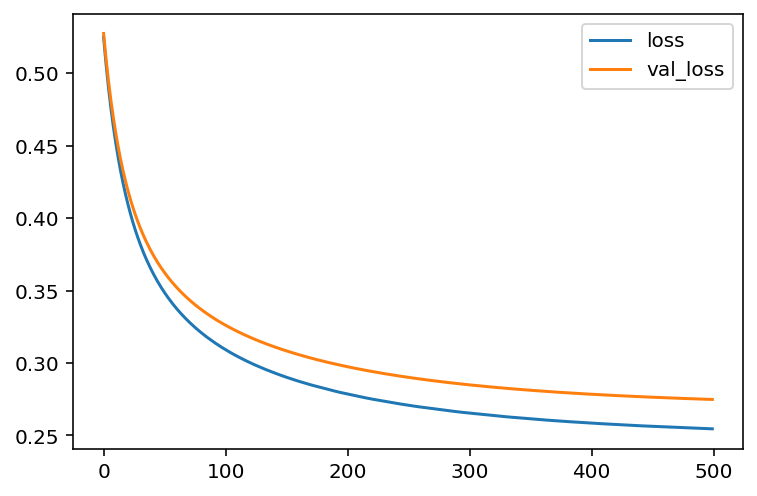

In [9]:
utils.plot_history(lr_history, ['loss', 'val_loss'])

In [10]:
lr_model.evaluate(test_x, test_y)

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2748770070075989, 0.85]

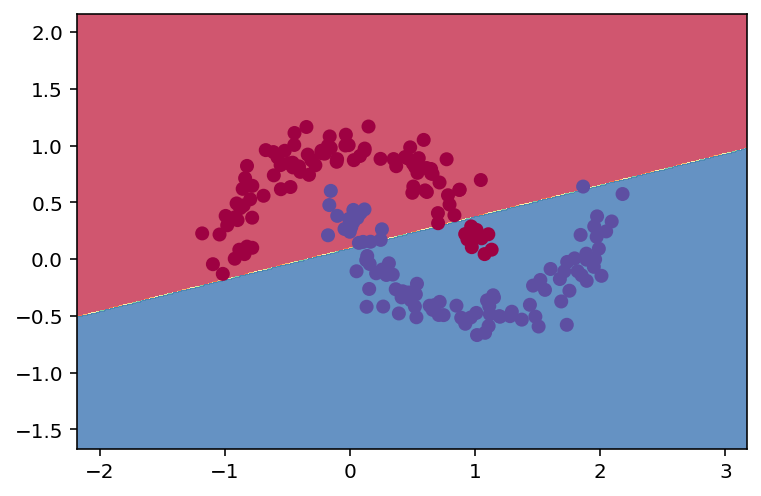

In [11]:
utils.plot_decision_boundary(lr_model, test_x, test_y)

### Neural Network

LR works not so well when features are not linearly separable. It depends heavily on features, so feature engineering is essential if you are using LR.

<img src="resources/2-layer-nn.png">

<br>
<center>A 2-layer neural network: 1 hidden layer + 1 output layer</center>

In [12]:
def build_nn_model(input_dim, layers, output_dim):
    # Input layer
    X = Input(shape=(input_dim,))#The second is arbitrary
    
    # Hidden layer(s)
    H = X
    for layer in layers:
        H = Dense(layer, activation='relu')(H)  #layer object which is callable
    
    # Output layer
    activation_func = 'softmax' if output_dim > 1 else 'sigmoid'   #binary sigmoid ,more than two softmax
    
    Y = Dense(output_dim, activation=activation_func)(H)
    return Model(inputs=X, outputs=Y)

In [13]:
nn_model = build_nn_model(
    input_dim=2,
    layers=[8], #layer=[16,8,4] Multilayer
    output_dim=1
)
nn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [14]:
nn_model.compile(
    loss='binary_crossentropy',\
    optimizer='Adam',#Adam(learning_rate=0.02),      #(learning_rate=0.02),\'Adam'
    metrics=['accuracy'],
)

In [15]:
nn_history = nn_model.fit(
    train_x, 
    train_y, 
    epochs=500, 
    validation_data=(test_x, test_y), ) #How many epochs should we have, first we should give a number and observe to see

Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - ETA: 8s - loss: 0.9654 - accuracy: 0.06 - 0s 571us/sample - loss: 0.9094 - accuracy: 0.1350 - val_loss: 0.8816 - val_accuracy: 0.1950
Epoch 2/500
800/800 [==============================] - ETA: 0s - loss: 0.8571 - accuracy: 0.18 - 0s 62us/sample - loss: 0.8574 - accuracy: 0.1713 - val_loss: 0.8324 - val_accuracy: 0.2200
Epoch 3/500
800/800 [==============================] - ETA: 0s - loss: 0.8563 - accuracy: 0.12 - 0s 57us/sample - loss: 0.8101 - accuracy: 0.2175 - val_loss: 0.7882 - val_accuracy: 0.2450
Epoch 4/500
800/800 [==============================] - ETA: 0s - loss: 0.7554 - accuracy: 0.37 - 0s 56us/sample - loss: 0.7677 - accuracy: 0.2950 - val_loss: 0.7480 - val_accuracy: 0.3000
Epoch 5/500
800/800 [==============================] - ETA: 0s - loss: 0.7231 - accuracy: 0.43 - 0s 57us/sample - loss: 0.7290 - accuracy: 0.3750 - val_loss: 0.7115 - val_accuracy: 0.4250
Epoch 6/500
8

800/800 [==============================] - ETA: 0s - loss: 0.3367 - accuracy: 0.84 - 0s 66us/sample - loss: 0.2649 - accuracy: 0.8875 - val_loss: 0.2793 - val_accuracy: 0.8700
Epoch 45/500
800/800 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.87 - 0s 66us/sample - loss: 0.2619 - accuracy: 0.8888 - val_loss: 0.2763 - val_accuracy: 0.8750
Epoch 46/500
800/800 [==============================] - ETA: 0s - loss: 0.3027 - accuracy: 0.87 - 0s 55us/sample - loss: 0.2591 - accuracy: 0.8900 - val_loss: 0.2736 - val_accuracy: 0.8750
Epoch 47/500
800/800 [==============================] - ETA: 0s - loss: 0.2994 - accuracy: 0.87 - 0s 54us/sample - loss: 0.2566 - accuracy: 0.8925 - val_loss: 0.2709 - val_accuracy: 0.8750
Epoch 48/500
800/800 [==============================] - ETA: 0s - loss: 0.2558 - accuracy: 0.93 - 0s 54us/sample - loss: 0.2539 - accuracy: 0.8938 - val_loss: 0.2684 - val_accuracy: 0.8750
Epoch 49/500
800/800 [==============================] - ETA: 0s - lo

800/800 [==============================] - ETA: 0s - loss: 0.3049 - accuracy: 0.81 - 0s 61us/sample - loss: 0.1938 - accuracy: 0.9175 - val_loss: 0.2073 - val_accuracy: 0.8800
Epoch 88/500
800/800 [==============================] - ETA: 0s - loss: 0.1545 - accuracy: 0.96 - 0s 56us/sample - loss: 0.1927 - accuracy: 0.9187 - val_loss: 0.2057 - val_accuracy: 0.8800
Epoch 89/500
800/800 [==============================] - ETA: 0s - loss: 0.1265 - accuracy: 0.96 - 0s 64us/sample - loss: 0.1913 - accuracy: 0.9175 - val_loss: 0.2046 - val_accuracy: 0.8800
Epoch 90/500
800/800 [==============================] - ETA: 0s - loss: 0.1901 - accuracy: 0.90 - 0s 66us/sample - loss: 0.1901 - accuracy: 0.9175 - val_loss: 0.2033 - val_accuracy: 0.8800
Epoch 91/500
800/800 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.96 - 0s 70us/sample - loss: 0.1889 - accuracy: 0.9187 - val_loss: 0.2018 - val_accuracy: 0.8800
Epoch 92/500
800/800 [==============================] - ETA: 0s - lo

800/800 [==============================] - ETA: 0s - loss: 0.0691 - accuracy: 1.00 - 0s 52us/sample - loss: 0.1378 - accuracy: 0.9425 - val_loss: 0.1473 - val_accuracy: 0.9300
Epoch 131/500
800/800 [==============================] - ETA: 0s - loss: 0.0847 - accuracy: 0.96 - 0s 56us/sample - loss: 0.1363 - accuracy: 0.9438 - val_loss: 0.1458 - val_accuracy: 0.9300
Epoch 132/500
800/800 [==============================] - ETA: 0s - loss: 0.1390 - accuracy: 0.93 - 0s 57us/sample - loss: 0.1351 - accuracy: 0.9438 - val_loss: 0.1445 - val_accuracy: 0.9350
Epoch 133/500
800/800 [==============================] - ETA: 0s - loss: 0.0916 - accuracy: 0.96 - 0s 56us/sample - loss: 0.1339 - accuracy: 0.9438 - val_loss: 0.1433 - val_accuracy: 0.9400
Epoch 134/500
800/800 [==============================] - ETA: 0s - loss: 0.1104 - accuracy: 0.93 - 0s 55us/sample - loss: 0.1326 - accuracy: 0.9450 - val_loss: 0.1419 - val_accuracy: 0.9450
Epoch 135/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.0964 - accuracy: 0.93 - 0s 67us/sample - loss: 0.0898 - accuracy: 0.9725 - val_loss: 0.0954 - val_accuracy: 0.9750
Epoch 174/500
800/800 [==============================] - ETA: 0s - loss: 0.1143 - accuracy: 0.96 - 0s 60us/sample - loss: 0.0888 - accuracy: 0.9725 - val_loss: 0.0948 - val_accuracy: 0.9750
Epoch 175/500
800/800 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 0.93 - 0s 59us/sample - loss: 0.0880 - accuracy: 0.9750 - val_loss: 0.0938 - val_accuracy: 0.9750
Epoch 176/500
800/800 [==============================] - ETA: 0s - loss: 0.0473 - accuracy: 1.00 - 0s 57us/sample - loss: 0.0871 - accuracy: 0.9750 - val_loss: 0.0926 - val_accuracy: 0.9750
Epoch 177/500
800/800 [==============================] - ETA: 0s - loss: 0.0914 - accuracy: 1.00 - 0s 61us/sample - loss: 0.0861 - accuracy: 0.9775 - val_loss: 0.0918 - val_accuracy: 0.9750
Epoch 178/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 1.00 - 0s 54us/sample - loss: 0.0589 - accuracy: 0.9862 - val_loss: 0.0627 - val_accuracy: 0.9950
Epoch 217/500
800/800 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 1.00 - 0s 54us/sample - loss: 0.0584 - accuracy: 0.9862 - val_loss: 0.0620 - val_accuracy: 0.9950
Epoch 218/500
800/800 [==============================] - ETA: 0s - loss: 0.0814 - accuracy: 0.96 - 0s 55us/sample - loss: 0.0580 - accuracy: 0.9862 - val_loss: 0.0616 - val_accuracy: 0.9950
Epoch 219/500
800/800 [==============================] - ETA: 0s - loss: 0.0628 - accuracy: 0.96 - 0s 67us/sample - loss: 0.0573 - accuracy: 0.9862 - val_loss: 0.0611 - val_accuracy: 0.9950
Epoch 220/500
800/800 [==============================] - ETA: 0s - loss: 0.0659 - accuracy: 0.96 - 0s 54us/sample - loss: 0.0568 - accuracy: 0.9862 - val_loss: 0.0603 - val_accuracy: 0.9950
Epoch 221/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 1.00 - 0s 52us/sample - loss: 0.0403 - accuracy: 0.9925 - val_loss: 0.0427 - val_accuracy: 0.9950
Epoch 260/500
800/800 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 1.00 - 0s 51us/sample - loss: 0.0400 - accuracy: 0.9925 - val_loss: 0.0422 - val_accuracy: 0.9950
Epoch 261/500
800/800 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 1.00 - 0s 61us/sample - loss: 0.0397 - accuracy: 0.9925 - val_loss: 0.0420 - val_accuracy: 0.9950
Epoch 262/500
800/800 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 1.00 - 0s 59us/sample - loss: 0.0394 - accuracy: 0.9925 - val_loss: 0.0418 - val_accuracy: 0.9950
Epoch 263/500
800/800 [==============================] - ETA: 0s - loss: 0.0226 - accuracy: 1.00 - 0s 56us/sample - loss: 0.0393 - accuracy: 0.9925 - val_loss: 0.0412 - val_accuracy: 0.9950
Epoch 264/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 1.00 - 0s 51us/sample - loss: 0.0291 - accuracy: 0.9950 - val_loss: 0.0307 - val_accuracy: 0.9950
Epoch 303/500
800/800 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 1.00 - 0s 54us/sample - loss: 0.0289 - accuracy: 0.9950 - val_loss: 0.0304 - val_accuracy: 0.9950
Epoch 304/500
800/800 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 1.00 - 0s 54us/sample - loss: 0.0287 - accuracy: 0.9950 - val_loss: 0.0304 - val_accuracy: 0.9950
Epoch 305/500
800/800 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 1.00 - 0s 59us/sample - loss: 0.0285 - accuracy: 0.9950 - val_loss: 0.0299 - val_accuracy: 0.9950
Epoch 306/500
800/800 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 1.00 - 0s 57us/sample - loss: 0.0283 - accuracy: 0.9962 - val_loss: 0.0298 - val_accuracy: 0.9950
Epoch 307/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 1.00 - 0s 54us/sample - loss: 0.0219 - accuracy: 0.9962 - val_loss: 0.0230 - val_accuracy: 0.9950
Epoch 346/500
800/800 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 1.00 - 0s 56us/sample - loss: 0.0218 - accuracy: 0.9962 - val_loss: 0.0226 - val_accuracy: 0.9950
Epoch 347/500
800/800 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 1.00 - 0s 56us/sample - loss: 0.0217 - accuracy: 0.9962 - val_loss: 0.0228 - val_accuracy: 0.9950
Epoch 348/500
800/800 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 1.00 - 0s 55us/sample - loss: 0.0215 - accuracy: 0.9962 - val_loss: 0.0226 - val_accuracy: 0.9950
Epoch 349/500
800/800 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.96 - 0s 55us/sample - loss: 0.0214 - accuracy: 0.9962 - val_loss: 0.0224 - val_accuracy: 0.9950
Epoch 350/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 1.00 - 0s 86us/sample - loss: 0.0172 - accuracy: 0.9975 - val_loss: 0.0179 - val_accuracy: 0.9950
Epoch 389/500
800/800 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 1.00 - 0s 82us/sample - loss: 0.0171 - accuracy: 0.9975 - val_loss: 0.0178 - val_accuracy: 0.9950
Epoch 390/500
800/800 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 1.00 - 0s 74us/sample - loss: 0.0170 - accuracy: 0.9975 - val_loss: 0.0178 - val_accuracy: 0.9950
Epoch 391/500
800/800 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 1.00 - 0s 66us/sample - loss: 0.0170 - accuracy: 0.9975 - val_loss: 0.0177 - val_accuracy: 0.9950
Epoch 392/500
800/800 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 1.00 - 0s 65us/sample - loss: 0.0168 - accuracy: 0.9975 - val_loss: 0.0174 - val_accuracy: 0.9950
Epoch 393/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 1.00 - 0s 52us/sample - loss: 0.0140 - accuracy: 0.9987 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 432/500
800/800 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 1.00 - 0s 56us/sample - loss: 0.0141 - accuracy: 0.9987 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 433/500
800/800 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 1.00 - 0s 54us/sample - loss: 0.0139 - accuracy: 0.9987 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 434/500
800/800 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 1.00 - 0s 55us/sample - loss: 0.0139 - accuracy: 0.9987 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 435/500
800/800 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 1.00 - 0s 60us/sample - loss: 0.0138 - accuracy: 0.9987 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 436/500
800/800 [==============================] - ETA: 0s

800/800 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 1.00 - 0s 56us/sample - loss: 0.0118 - accuracy: 0.9987 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 475/500
800/800 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 1.00 - 0s 54us/sample - loss: 0.0118 - accuracy: 0.9987 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 476/500
800/800 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 1.00 - 0s 54us/sample - loss: 0.0117 - accuracy: 0.9987 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 477/500
800/800 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 1.00 - 0s 57us/sample - loss: 0.0116 - accuracy: 0.9987 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 478/500
800/800 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 1.00 - 0s 59us/sample - loss: 0.0116 - accuracy: 0.9987 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 479/500
800/800 [==============================] - ETA: 0s

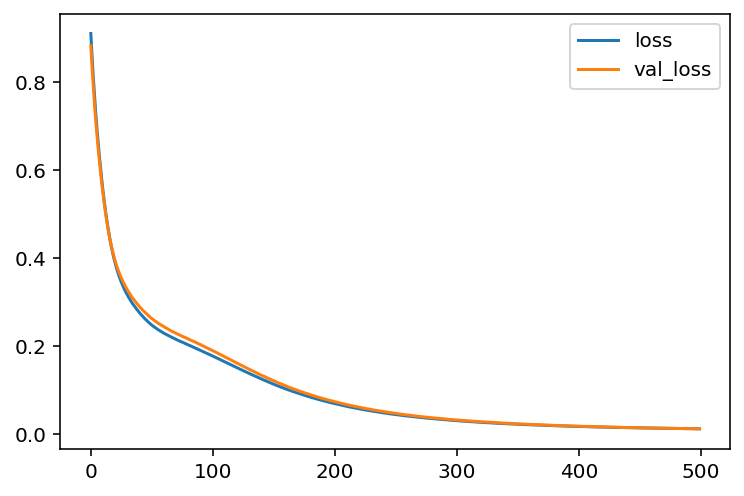

In [16]:
utils.plot_history(nn_history, ['loss', 'val_loss'])

In [17]:
nn_model.evaluate(test_x, test_y)

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.010738784819841385, 1.0]

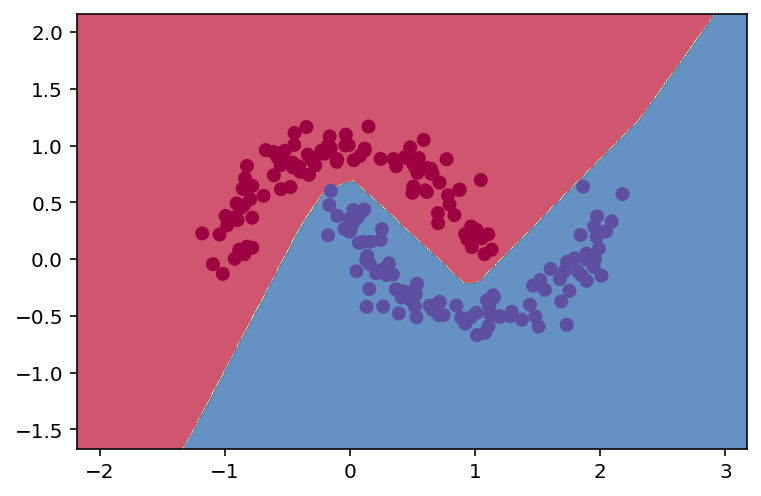

In [18]:
utils.plot_decision_boundary(nn_model, test_x, test_y)

Bag of words n gram = sentence level encoding or embedding 把一个句子变成一个向量

Word embedding 是把一个单词变成向量是word level，可以保留原本单词的意思

原理就是相近的单词被group到一起

https://projector.tensorflow.org/

## Word Embedding

<img src="resources/word-vector.png" width="800">

### Emoji Classifier

<img src="resources/emoji.png" width="800">

In [19]:
train_x, test_x, train_y, test_y = utils.load_emoji()

In [20]:
# Download and load word embeddings
# This util function returns two dict: word_to_index and word_to_vec
# At this moment, we only need the second part
_, word_to_vec_map = utils.load_glove_vecs()

data already available, skip downloading.
loading glove... this may take a while...
glove loaded successfully.


In [21]:
# Print the first 5 samples
for i in range(5):
    print(train_x[i], utils.label_to_emoji(train_y[i]))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴


In [22]:
# Convert output to one hot vector, like 3 is converted to one hot [0,0,0,1,0]
train_y_oh = utils.convert_to_one_hot(train_y, 5)
test_y_oh = utils.convert_to_one_hot(test_y, 5)

print(train_y[0], "is converted into one hot", train_y_oh[0]) 

3 is converted into one hot [0. 0. 0. 1. 0.]


In [23]:
avg = utils.sentence_to_avg("I like it", word_to_vec_map)
avg

array([ 0.36627333,  0.04672333, -0.138081  , -0.24937467,  0.48939667,
        0.04623667, -0.47231333, -0.14826667, -0.457185  ,  0.20397252,
       -0.10503   ,  0.60011667, -0.61682667, -0.1575    ,  0.78038333,
        0.55919   ,  0.29008333,  0.34581633, -0.22630233, -0.70794   ,
       -0.30531333,  0.34949667,  0.46258333,  0.234054  ,  0.63990667,
       -2.12683333, -1.06518   ,  0.45987   ,  0.74048667, -0.92987667,
        3.59586667,  0.33653667, -0.282609  , -0.01870267, -0.19816133,
       -0.202     ,  0.05308333,  0.35650667,  0.30246667, -0.23844333,
       -0.07741177,  0.226214  , -0.09908807,  0.37313   ,  0.06784867,
        0.37182667, -0.147618  , -0.43038933, -0.25390733,  0.44703333])

In [24]:
train_x = np.array(
    [utils.sentence_to_avg(x, word_to_vec_map) for x in train_x])

test_x = np.array(
    [utils.sentence_to_avg(x, word_to_vec_map) for x in test_x])

In [25]:
len(word_to_vec_map['good'])#every word is 50 dimensions, so the input_dim is 50

50

In [26]:
emoji_model = build_nn_model(
    input_dim=50, 
    layers=[50], 
    output_dim=5)

emoji_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    
    metrics=['accuracy'],
)

In [27]:
emoji_history = emoji_model.fit(
    train_x, 
    train_y_oh, 
    epochs=500, 
    shuffle=True, # so it would be random having nothing to do with the sequence
    validation_data=(test_x, test_y_oh), )

Train on 132 samples, validate on 56 samples
Epoch 1/500
132/132 [==============================] - ETA: 1s - loss: 1.8453 - accuracy: 0.25 - 1s 4ms/sample - loss: 1.7086 - accuracy: 0.2803 - val_loss: 1.5512 - val_accuracy: 0.3214
Epoch 2/500
132/132 [==============================] - ETA: 0s - loss: 1.6226 - accuracy: 0.28 - 0s 189us/sample - loss: 1.6037 - accuracy: 0.2955 - val_loss: 1.4944 - val_accuracy: 0.3750
Epoch 3/500
132/132 [==============================] - ETA: 0s - loss: 1.5159 - accuracy: 0.37 - 0s 174us/sample - loss: 1.5420 - accuracy: 0.3106 - val_loss: 1.4601 - val_accuracy: 0.4286
Epoch 4/500
132/132 [==============================] - ETA: 0s - loss: 1.5259 - accuracy: 0.31 - 0s 166us/sample - loss: 1.5029 - accuracy: 0.3561 - val_loss: 1.4362 - val_accuracy: 0.3929
Epoch 5/500
132/132 [==============================] - ETA: 0s - loss: 1.4304 - accuracy: 0.40 - 0s 159us/sample - loss: 1.4682 - accuracy: 0.3864 - val_loss: 1.4145 - val_accuracy: 0.3750
Epoch 6/500


Epoch 44/500
132/132 [==============================] - ETA: 0s - loss: 0.8675 - accuracy: 0.78 - 0s 151us/sample - loss: 0.7201 - accuracy: 0.8106 - val_loss: 0.8283 - val_accuracy: 0.7500
Epoch 45/500
132/132 [==============================] - ETA: 0s - loss: 0.8183 - accuracy: 0.75 - 0s 151us/sample - loss: 0.7096 - accuracy: 0.8258 - val_loss: 0.8196 - val_accuracy: 0.7500
Epoch 46/500
132/132 [==============================] - ETA: 0s - loss: 0.7557 - accuracy: 0.78 - 0s 151us/sample - loss: 0.6981 - accuracy: 0.8258 - val_loss: 0.8082 - val_accuracy: 0.7679
Epoch 47/500
132/132 [==============================] - ETA: 0s - loss: 0.5971 - accuracy: 0.90 - 0s 144us/sample - loss: 0.6878 - accuracy: 0.8258 - val_loss: 0.7953 - val_accuracy: 0.7857
Epoch 48/500
132/132 [==============================] - ETA: 0s - loss: 0.7232 - accuracy: 0.78 - 0s 136us/sample - loss: 0.6803 - accuracy: 0.8333 - val_loss: 0.7876 - val_accuracy: 0.8036
Epoch 49/500
132/132 [============================

132/132 [==============================] - ETA: 0s - loss: 0.4479 - accuracy: 0.90 - 0s 136us/sample - loss: 0.4438 - accuracy: 0.8864 - val_loss: 0.5767 - val_accuracy: 0.7857
Epoch 88/500
132/132 [==============================] - ETA: 0s - loss: 0.4396 - accuracy: 0.93 - 0s 144us/sample - loss: 0.4343 - accuracy: 0.8788 - val_loss: 0.5755 - val_accuracy: 0.8036
Epoch 89/500
132/132 [==============================] - ETA: 0s - loss: 0.3133 - accuracy: 1.00 - 0s 136us/sample - loss: 0.4368 - accuracy: 0.9167 - val_loss: 0.5833 - val_accuracy: 0.8214
Epoch 90/500
132/132 [==============================] - ETA: 0s - loss: 0.4409 - accuracy: 0.93 - 0s 159us/sample - loss: 0.4333 - accuracy: 0.9167 - val_loss: 0.5796 - val_accuracy: 0.8036
Epoch 91/500
132/132 [==============================] - ETA: 0s - loss: 0.5609 - accuracy: 0.90 - 0s 166us/sample - loss: 0.4270 - accuracy: 0.9167 - val_loss: 0.5720 - val_accuracy: 0.8214
Epoch 92/500
132/132 [==============================] - ETA: 0s

Epoch 130/500
132/132 [==============================] - ETA: 0s - loss: 0.3148 - accuracy: 0.96 - 0s 151us/sample - loss: 0.3050 - accuracy: 0.9545 - val_loss: 0.4765 - val_accuracy: 0.8036
Epoch 131/500
132/132 [==============================] - ETA: 0s - loss: 0.2882 - accuracy: 0.96 - 0s 151us/sample - loss: 0.3011 - accuracy: 0.9621 - val_loss: 0.4722 - val_accuracy: 0.8036
Epoch 132/500
132/132 [==============================] - ETA: 0s - loss: 0.2567 - accuracy: 1.00 - 0s 144us/sample - loss: 0.2997 - accuracy: 0.9697 - val_loss: 0.4719 - val_accuracy: 0.8214
Epoch 133/500
132/132 [==============================] - ETA: 0s - loss: 0.2247 - accuracy: 1.00 - 0s 144us/sample - loss: 0.2987 - accuracy: 0.9697 - val_loss: 0.4668 - val_accuracy: 0.8214
Epoch 134/500
132/132 [==============================] - ETA: 0s - loss: 0.3225 - accuracy: 0.96 - 0s 136us/sample - loss: 0.2947 - accuracy: 0.9697 - val_loss: 0.4614 - val_accuracy: 0.8214
Epoch 135/500
132/132 [======================

Epoch 173/500
132/132 [==============================] - ETA: 0s - loss: 0.1480 - accuracy: 1.00 - 0s 151us/sample - loss: 0.2264 - accuracy: 0.9545 - val_loss: 0.4274 - val_accuracy: 0.8393
Epoch 174/500
132/132 [==============================] - ETA: 0s - loss: 0.2226 - accuracy: 0.93 - 0s 151us/sample - loss: 0.2318 - accuracy: 0.9545 - val_loss: 0.4226 - val_accuracy: 0.8571
Epoch 175/500
132/132 [==============================] - ETA: 0s - loss: 0.2168 - accuracy: 0.96 - 0s 144us/sample - loss: 0.2276 - accuracy: 0.9545 - val_loss: 0.4116 - val_accuracy: 0.8214
Epoch 176/500
132/132 [==============================] - ETA: 0s - loss: 0.1850 - accuracy: 0.93 - 0s 166us/sample - loss: 0.2211 - accuracy: 0.9545 - val_loss: 0.4072 - val_accuracy: 0.8214
Epoch 177/500
132/132 [==============================] - ETA: 0s - loss: 0.2401 - accuracy: 0.93 - 0s 144us/sample - loss: 0.2187 - accuracy: 0.9697 - val_loss: 0.4057 - val_accuracy: 0.8393
Epoch 178/500
132/132 [======================

Epoch 216/500
132/132 [==============================] - ETA: 0s - loss: 0.1208 - accuracy: 1.00 - 0s 144us/sample - loss: 0.1731 - accuracy: 0.9773 - val_loss: 0.4076 - val_accuracy: 0.8214
Epoch 217/500
132/132 [==============================] - ETA: 0s - loss: 0.1446 - accuracy: 1.00 - 0s 144us/sample - loss: 0.1748 - accuracy: 0.9621 - val_loss: 0.4181 - val_accuracy: 0.8214
Epoch 218/500
132/132 [==============================] - ETA: 0s - loss: 0.1257 - accuracy: 1.00 - 0s 144us/sample - loss: 0.1783 - accuracy: 0.9621 - val_loss: 0.4127 - val_accuracy: 0.8214
Epoch 219/500
132/132 [==============================] - ETA: 0s - loss: 0.1925 - accuracy: 0.96 - 0s 159us/sample - loss: 0.1755 - accuracy: 0.9621 - val_loss: 0.4068 - val_accuracy: 0.8214
Epoch 220/500
132/132 [==============================] - ETA: 0s - loss: 0.1424 - accuracy: 1.00 - 0s 136us/sample - loss: 0.1722 - accuracy: 0.9621 - val_loss: 0.3978 - val_accuracy: 0.8214
Epoch 221/500
132/132 [======================

Epoch 259/500
132/132 [==============================] - ETA: 0s - loss: 0.0980 - accuracy: 1.00 - 0s 151us/sample - loss: 0.1367 - accuracy: 0.9773 - val_loss: 0.3977 - val_accuracy: 0.8214
Epoch 260/500
132/132 [==============================] - ETA: 0s - loss: 0.0868 - accuracy: 1.00 - 0s 136us/sample - loss: 0.1359 - accuracy: 0.9773 - val_loss: 0.3975 - val_accuracy: 0.8214
Epoch 261/500
132/132 [==============================] - ETA: 0s - loss: 0.1261 - accuracy: 1.00 - 0s 136us/sample - loss: 0.1384 - accuracy: 0.9773 - val_loss: 0.3912 - val_accuracy: 0.8214
Epoch 262/500
132/132 [==============================] - ETA: 0s - loss: 0.1137 - accuracy: 0.96 - 0s 136us/sample - loss: 0.1375 - accuracy: 0.9773 - val_loss: 0.3810 - val_accuracy: 0.8214
Epoch 263/500
132/132 [==============================] - ETA: 0s - loss: 0.1251 - accuracy: 0.96 - 0s 144us/sample - loss: 0.1337 - accuracy: 0.9773 - val_loss: 0.3750 - val_accuracy: 0.8214
Epoch 264/500
132/132 [======================

Epoch 302/500
132/132 [==============================] - ETA: 0s - loss: 0.1132 - accuracy: 1.00 - 0s 166us/sample - loss: 0.1089 - accuracy: 0.9848 - val_loss: 0.3823 - val_accuracy: 0.8393
Epoch 303/500
132/132 [==============================] - ETA: 0s - loss: 0.0734 - accuracy: 1.00 - 0s 181us/sample - loss: 0.1095 - accuracy: 0.9773 - val_loss: 0.3774 - val_accuracy: 0.8393
Epoch 304/500
132/132 [==============================] - ETA: 0s - loss: 0.0890 - accuracy: 1.00 - 0s 174us/sample - loss: 0.1087 - accuracy: 0.9773 - val_loss: 0.3813 - val_accuracy: 0.8393
Epoch 305/500
132/132 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 1.00 - 0s 166us/sample - loss: 0.1074 - accuracy: 0.9773 - val_loss: 0.3861 - val_accuracy: 0.8393
Epoch 306/500
132/132 [==============================] - ETA: 0s - loss: 0.1339 - accuracy: 0.96 - 0s 166us/sample - loss: 0.1067 - accuracy: 0.9848 - val_loss: 0.3915 - val_accuracy: 0.8393
Epoch 307/500
132/132 [======================

Epoch 345/500
132/132 [==============================] - ETA: 0s - loss: 0.0661 - accuracy: 1.00 - 0s 159us/sample - loss: 0.0889 - accuracy: 0.9848 - val_loss: 0.3799 - val_accuracy: 0.8393
Epoch 346/500
132/132 [==============================] - ETA: 0s - loss: 0.0609 - accuracy: 1.00 - 0s 159us/sample - loss: 0.0892 - accuracy: 0.9848 - val_loss: 0.3856 - val_accuracy: 0.8393
Epoch 347/500
132/132 [==============================] - ETA: 0s - loss: 0.1301 - accuracy: 0.96 - 0s 144us/sample - loss: 0.0891 - accuracy: 0.9848 - val_loss: 0.3878 - val_accuracy: 0.8393
Epoch 348/500
132/132 [==============================] - ETA: 0s - loss: 0.0916 - accuracy: 0.96 - 0s 151us/sample - loss: 0.0877 - accuracy: 0.9848 - val_loss: 0.3893 - val_accuracy: 0.8393
Epoch 349/500
132/132 [==============================] - ETA: 0s - loss: 0.0752 - accuracy: 1.00 - 0s 174us/sample - loss: 0.0868 - accuracy: 0.9848 - val_loss: 0.3898 - val_accuracy: 0.8393
Epoch 350/500
132/132 [======================

Epoch 388/500
132/132 [==============================] - ETA: 0s - loss: 0.0837 - accuracy: 0.96 - 0s 181us/sample - loss: 0.0752 - accuracy: 0.9848 - val_loss: 0.3855 - val_accuracy: 0.8214
Epoch 389/500
132/132 [==============================] - ETA: 0s - loss: 0.0743 - accuracy: 0.96 - 0s 166us/sample - loss: 0.0722 - accuracy: 0.9848 - val_loss: 0.3988 - val_accuracy: 0.8214
Epoch 390/500
132/132 [==============================] - ETA: 0s - loss: 0.1127 - accuracy: 0.96 - 0s 174us/sample - loss: 0.0713 - accuracy: 0.9924 - val_loss: 0.4022 - val_accuracy: 0.8214
Epoch 391/500
132/132 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 1.00 - 0s 166us/sample - loss: 0.0719 - accuracy: 0.9924 - val_loss: 0.3983 - val_accuracy: 0.8214
Epoch 392/500
132/132 [==============================] - ETA: 0s - loss: 0.0696 - accuracy: 1.00 - 0s 159us/sample - loss: 0.0712 - accuracy: 0.9924 - val_loss: 0.4106 - val_accuracy: 0.8214
Epoch 393/500
132/132 [======================

Epoch 431/500
132/132 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 1.00 - 0s 136us/sample - loss: 0.0604 - accuracy: 0.9924 - val_loss: 0.3807 - val_accuracy: 0.8393
Epoch 432/500
132/132 [==============================] - ETA: 0s - loss: 0.0993 - accuracy: 0.96 - 0s 144us/sample - loss: 0.0604 - accuracy: 0.9924 - val_loss: 0.3852 - val_accuracy: 0.8214
Epoch 433/500
132/132 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 1.00 - 0s 144us/sample - loss: 0.0592 - accuracy: 0.9924 - val_loss: 0.3818 - val_accuracy: 0.8036
Epoch 434/500
132/132 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 1.00 - 0s 174us/sample - loss: 0.0601 - accuracy: 0.9924 - val_loss: 0.3868 - val_accuracy: 0.8036
Epoch 435/500
132/132 [==============================] - ETA: 0s - loss: 0.0852 - accuracy: 1.00 - 0s 144us/sample - loss: 0.0596 - accuracy: 0.9924 - val_loss: 0.3887 - val_accuracy: 0.8036
Epoch 436/500
132/132 [======================

Epoch 474/500
132/132 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 1.00 - 0s 159us/sample - loss: 0.0491 - accuracy: 0.9924 - val_loss: 0.3852 - val_accuracy: 0.8036
Epoch 475/500
132/132 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 1.00 - 0s 151us/sample - loss: 0.0487 - accuracy: 0.9924 - val_loss: 0.3799 - val_accuracy: 0.8036
Epoch 476/500
132/132 [==============================] - ETA: 0s - loss: 0.0974 - accuracy: 0.96 - 0s 144us/sample - loss: 0.0485 - accuracy: 0.9924 - val_loss: 0.3777 - val_accuracy: 0.8036
Epoch 477/500
132/132 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 1.00 - 0s 144us/sample - loss: 0.0479 - accuracy: 0.9924 - val_loss: 0.3772 - val_accuracy: 0.8036
Epoch 478/500
132/132 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.96 - 0s 136us/sample - loss: 0.0478 - accuracy: 0.9924 - val_loss: 0.3780 - val_accuracy: 0.8036
Epoch 479/500
132/132 [======================

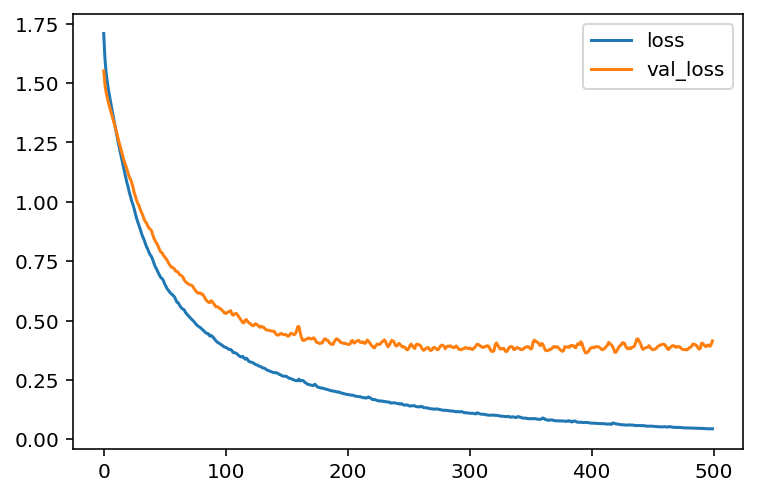

In [28]:
utils.plot_history(emoji_history, ['loss', 'val_loss'])

The model is complicated enough to because the loss is small, but the validation loss is not that small which is for the test data

When to stop? When the validation loss won't go any further down, like 300 epoch is enough. or add call back

In [29]:
def pred_emoji(text):
    embedding = np.array([utils.sentence_to_avg(text, word_to_vec_map)]) # get embedding
    pred = emoji_model.predict([embedding]) # predict, return the probability of each class
    label = np.argmax(pred) # choose the one with largest probability as label
    return utils.label_to_emoji(label)

In [30]:
tests = [
    "i love you", 
    "it's horrible", 
    "funny lol", 
    "lets play with a ball", 
    "food is ready", 
    "i don't like it"]

for test in tests:
    print(test,pred_emoji(test))

i love you ❤️
it's horrible 😞
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
i don't like it ❤️


单词前后出现的顺序丢失了，所以最后一句不对